# domain-wall type SSH lattice

This code will reproduce the results in Stephan's paper 
https://www.nature.com/articles/s42005-023-01230-z 
---
We will do the following: 
- time dynamics

In [5]:
import sys
root_folder = 'src/'
sys.path.insert(1, root_folder)

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

from sympy import symbols, solve
import math as m

from tqdm import tqdm

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline                

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
import functions as fp
from IPython.display import clear_output

# First test 

In [8]:
N = 10                        # number of unit cells. 2*N+1 sites
t1, t2 = 1, 0.7              #coupling strength

x,y = 0.48, 0.06   #coordinate in phase diagram 

gamma_AB = x 
gamma_A = gamma_AB
gamma_B = gamma_AB
g_A = gamma_AB + y
g_B = 0

Ns = 100
dt = 1 / Ns
t_max = 1400

Nt = int(t_max / dt)
tab_t = np.linspace(0, t_max, Nt)

In [5]:
x_save = fp.integrate_RK4(N, g_A, g_B, gamma_A, gamma_B, t1, t2, Nt, tab_t,dt)

(21, 140000)
(11, 140000)
(140000,)


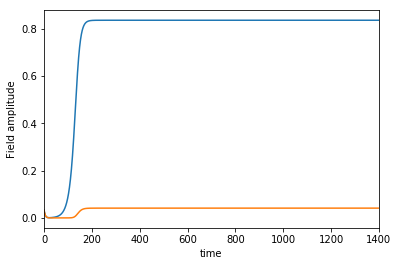

In [6]:
x_A = x_save[0:21:2,:]
x_B = x_save[1:21:2,:]
I_A = np.linalg.norm(x_A, axis=0)
I_B = np.linalg.norm(x_B, axis=0)
print(x_save.shape)
print(x_A.shape)
print(I_A.shape)

plt.plot(tab_t,I_A) 
plt.plot(tab_t,I_B)  
plt.xlim([0,t_max])

plt.xlabel("time")
plt.ylabel("Field amplitude")
plt.show()

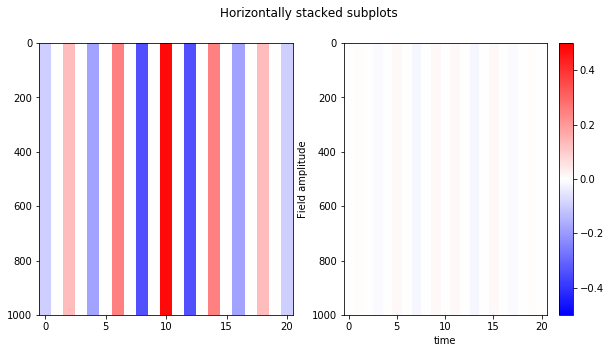

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
fig.suptitle('Horizontally stacked subplots')

ax1.imshow(np.real(np.transpose(x_save[:,int((t_max-10)/dt):int(t_max/dt)])),vmin=-0.5, vmax=0.5, interpolation='nearest', aspect='auto',cmap='bwr')
plot2 = ax2.imshow(np.imag(np.transpose(x_save[:,int((t_max-10)/dt):int(t_max/dt)])),vmin=-0.5, vmax=0.5, interpolation='none', aspect='auto',cmap='bwr')

plt.xlabel("time")
plt.ylabel("Field amplitude")
cbar = fig.colorbar(plot2, ax=ax2)
# cbar.minorticks_on()
plt.show()

In [9]:
x,y = 0.16, 0.44   #coordinate in phase diagram 
gamma_AB = x 
gamma_A = gamma_AB
gamma_B = gamma_AB
g_A = gamma_AB + y
g_B = 0

In [10]:
x_save = fp.integrate_RK4(N, g_A, g_B, gamma_A, gamma_B, t1, t2, Nt, tab_t,dt)

(21, 60000)
(11, 60000)
(60000,)


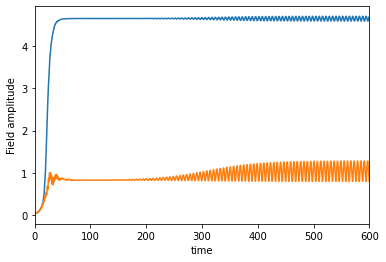

In [11]:
x_A = x_save[0:21:2,:]
x_B = x_save[1:21:2,:]
I_A = np.linalg.norm(x_A, axis=0)
I_B = np.linalg.norm(x_B, axis=0)
print(x_save.shape)
print(x_A.shape)
print(I_A.shape)

plt.plot(tab_t,I_A) 
plt.plot(tab_t,I_B)  
plt.xlim([0,t_max])

plt.xlabel("time")
plt.ylabel("Field amplitude")
plt.show()

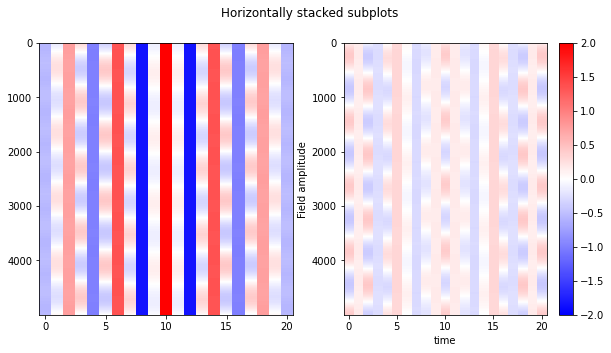

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
fig.suptitle('Horizontally stacked subplots')

ax1.imshow(np.real(np.transpose(x_save[:,int((t_max-50)/dt):int(t_max/dt)])),vmin=-2, vmax=2, interpolation='nearest', aspect='auto',cmap='bwr')
plot2 = ax2.imshow(np.imag(np.transpose(x_save[:,int((t_max-50)/dt):int(t_max/dt)])),vmin=-2, vmax=2, interpolation='none', aspect='auto',cmap='bwr')

plt.xlabel("time")
plt.ylabel("Field amplitude")
cbar = fig.colorbar(plot2, ax=ax2)
# cbar.minorticks_on()
plt.show()

# Calculate for multiple points

In [9]:
N = 10                        # number of unit cells. 2*N+1 sites
t1, t2 = 1, 0.7              #coupling strength

x,y = 0.48, 0.06   #coordinate in phase diagram 

gamma_AB = x 
gamma_A = gamma_AB
gamma_B = gamma_AB
g_A = gamma_AB + y
g_B = 0

Ns = 100
dt = 1 / Ns
t_max = 1400

Nt = int(t_max / dt)
tab_t = np.linspace(0, t_max, Nt)

In [10]:
tab_xy = [[0.16, 0.44],[0.48, 0.06]]

In [11]:
x = fp.g_scan(N, tab_xy, g_B, t1, t2, Nt, tab_t, dt)
print(x.shape)

20000 140000
(2, 21, 2000)


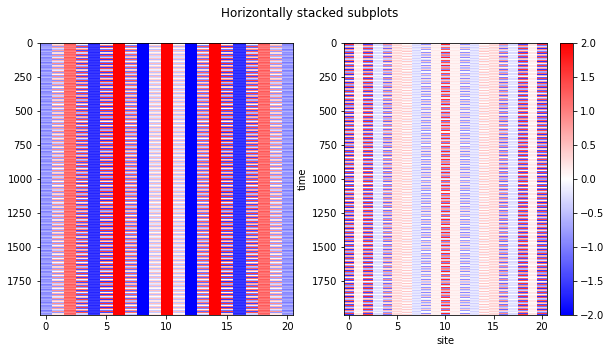

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10, 5))
fig.suptitle('Horizontally stacked subplots')

ax1.imshow(np.real(np.transpose(x[1,:,:])),vmin=-2, vmax=2, interpolation='nearest', aspect='auto',cmap='bwr')
plot2 = ax2.imshow(np.imag(np.transpose(x[1,:,:])),vmin=-2, vmax=2, interpolation='none', aspect='auto',cmap='bwr')

plt.xlabel("site")
plt.ylabel("time")
cbar = fig.colorbar(plot2, ax=ax2)
# cbar.minorticks_on()
plt.show()
        

In [61]:
pN = 50
plt.plot(tab_t,psi_sweep[pN,0,:]) 
plt.plot(tab_t,psi_sweep[pN,1,:]) 
plt.xlim([0,t_max])
# plt.xlim([t_max-30,t_max])
plt.xlabel("time")
plt.ylabel("Field amplitude")
plt.show()

NameError: name 'psi_sweep' is not defined

In [23]:
N = 1                         #number of rings
v, w = 0.3, 0.4                #coupling strength

omega0 = 1
A_ = 1
B_ = 4 
theta = 5
eta = 1

Nsweep = 60
tab_I = np.exp(np.linspace(0, 5.2, Nsweep))-1
tab_A = np.sqrt(tab_I)
A_probe = 0

Ns = 100
T = 2*np.pi / omega0
dt = T / Ns
t_max = 100
Nt = int(t_max / dt)
tab_t = np.linspace(0, t_max, Nt)



In [24]:
psi_sweep = np.empty((Nt, 2*N)).astype(complex)
psi_sweep = fp.A_scan(tab_A, omega0, eta, theta, A_, B_, N, Nsweep, Nt, tab_t,dt, 0.11, 0.1)

Iter: 60/60
